## 회귀모델(regression model)

데이터 셋 : https://gist.github.com/rickiepark/2cd82455e985001542047d7d55d50630

- 지도학습(정답데이터 필요, 필수)
- 예측 -> 도미의 길이가 10cm이면 무게는?
- 데이터의 경향을 잘 반영하고 있는 선형 방정식을 찾는 것을 의미한다.
  - loss를 최소화한다.

도미와 빙어를 구분하는 머신러능 모델을 성공적으로 개발한 후 자신감이 뿜뿜

사장님이 새로운 요구사항을 하신다. 저런..

현재상황 : 여름 농어철로 <mark>농어</mark> 주문이 크게 늘어나 마켓은 업계최초로 농어를 무게 단위로 판매하고자 함(농어를 마리당 가격으로 판매했더니 볼품없는 농어를 받는 고객이 항의)

요구사항 : 농어의 길이를 가지고 무게를 예측

### K-NN 회귀
- K-NN 회귀는 가까운 K개의 원소를 이용하여 평균을 낸 후 예측을 한다.
  - 궁금 : 이걸 가지고 일반화 할 수 있는 것일까? - 허술한 방법

- 분류와 동일하게 임의의 데이터의 예측값을 예측하기 위해서 K개의 이웃의 수치데이터를 바탕으로 평균을 내어 예측하는 방법

- 데이터의 양이 많아야 하며, 데이터의 분산값이 큰 경우는 사용하기 힘들다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. DATA LOAD

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
print(type(perch_length))
print(type(perch_weight))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(perch_length.shape)
print(perch_weight.shape)
# len으로도 가능하다.
# 나는 numpy를 이용

(56,)
(56,)


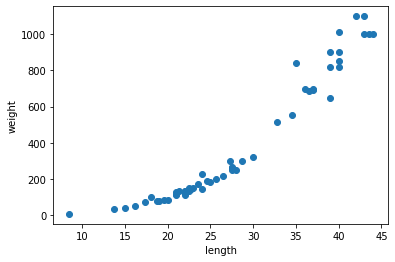

In [5]:
# 농어의 길이와 무게는 양의 상관관계를 가지고 있다.(시험)
# 농어의 길이가 늘어나면, 무게도 늘어난다.
# 회귀는 상관관계가 있어야 이용할 수 있는 모델이다.

# 상관관계 분석
# 1에 가까울수록 양의 상관관계이고, -1에 가까울수록 음의 상관관계이다.
# 0에 가깝다면 상관관계가 없다고 볼 수 있다. - 회귀분석할 필요가 없다.
# 보통 상관관계가 있다고 보려면 +- 0.4 가 되어야 한다.

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

참고
matplotlib으로 직선 그리기



```
plt.plot([x축의 양 끝점], [y축의 양 끝점])
```


### 2. Train/Test split

In [6]:
# 종류가 농어 하나 뿐이므로 클래스별 추출이 필요가 없다.
# 랜덤 추출을 하더라도 층별로 몰릴 수 있기 때문에 층화추출을 이용해서 층별로 데이터를 랜덤 추출하는 방식을 쓴다. 직접 코드를 구현해야한다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


### 3. Data Processing
### 모델 입력데이터 2차원 배열 값으로 입력



```
# 1차원 배열 [1,2,3,4,5]
# 2차원 배열[[1], [2], [3], [4],[5]]
```



In [9]:
# 1차원 배열
print(perch_weight.shape)

(56,)


In [10]:
# matrix transform

test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [11]:
# 이미지 전처리
test_array = test_array.reshape(2,2)  # x, y
print(test_array)

[[1 2]
 [3 4]]


In [12]:
# -1이란? 그냥 고려안하고 자동으로 맞추겠다.
# -1을 사용하면 나머지 원소 개수로 모두 채우라는 의미이다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


In [14]:
print(test_input)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [15]:
## 최근접 회귀 시작
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr = KNeighborsRegressor()

In [17]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 결정 계수
상관계수 (r)
- 두 양적변수간 회귀관계 측정
- 상관관계 정도를 나타냄
- -1 ~ 1 사이의 값

결정계수(r^2)
- 회귀선에 각각의 값들이 얼마나 가까운지를 측정
- 회귀선이 얼마나 실제 값을 잘 예측할 수 있는지 말해줌
- 0 ~ 1의 값을 갖는다
- R^2의 값이 1에 가까울 수록 정확해진다

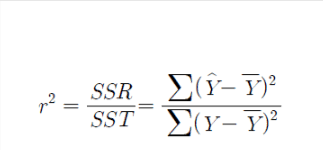

In [18]:
# 결정 계수 - R^2
# regression models = score X
knr.score(test_input, test_target)

0.992809406101064

In [19]:
knr.score(train_input, train_target)

0.9698823289099254

### 6. MAE(Mean Absolute Error)

- 타깃과 예측의 절대값의 오차를 평균해서 반환한다.

In [20]:
from sklearn.metrics import mean_absolute_error


In [21]:
test_prediction = knr.predict(test_input) # 예측된 무게의 값을 저장한다.
mae = mean_absolute_error(test_target, test_prediction) # 실제 값과 예측값의 비교
print(mae) # +-로 19kg 정도의 오차가 있다.

19.157142857142862


### 과대적합 \ 과소적합
- Train 성능은 좋은데 Test 성능은 좋지 않음            ->과대적합(훈련세트에서만 잘 동작)
- Train보다 Test 성능이 더 좋거나, 둘다 좋지 않을 수 있음  -> 과소적합
- 훈련 세트가 전체 데이터를 대표한다고 가정하기 대문에 훈련세트를 잘 학습하는 것이 중요
> 과소접합이 나타는 이유는 Train, TEst 데이터 세트의 크기가 매우 작거나, Test데이터가 Train의 특징을 다 담지 못하는 경우

> 중요! 일반화 된 모델을 만드는 것이 중요!!!
병원 예 : 요양벙원 환자 데이터 => 한국 주요 질병 예측모델
=> 고령환자에게만 잘 맞는 모델이 생송됨 (일반화X)

> Best 모델 : Train 으로 학습을 했기 때문에 Train 데이터에서 조금 더 높은 성능 보여

## 과대적합과 과소적합
- Train 성능은 좋은데 Test성능은 좋지 않은 겨우 -> 과대적합 (학습이 너무 많이 이루어져서 훈련세트에서만 잘 동작한다.)
- Train 보다는 Test 성능이 더 좋거나, 둘다 좋지 않음 -> 과소적합


과대적합
- Train 데이터에 아예 꽉 맞추어서 적합
- 그냥 문제와 답을 외워버린 경우를 생각하면 쉬움.
- Test 데이터에 대한 응용력이 떨어짐


과소적합
- Train 데이터에도 취약하고 Test 데이터에도 취약
- 야예 둘다 못해버림 -> 공부좀 더 해야한다.

그래서

훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련세트를 잘 학습하는 것이 중요
> 과소 적합이 나타나는 이유는 Train, Test 데이터 세트 크기가 너무 작거나, Test 데이터가 Train의 특징을 다 담지 못하는 경우 발생한다.

중요 : 일반화된 모델을 만드는 것이 중요하다 !


의료 데이터를 기반으로 하는 예시 => 한국 주요 질병을 예측하는 모델 => 고령화 환자에게만 잘 맞는 모델이 생성됨 => 일반화가 이루어지지 않는다.
> Best 모델 : Train 데이터를 사용한 평가 결과가 조금 더 높게 나오는 경우가 짱이다.
이유는 Train 으로 학습했기 때문에 Train 데이터에서 조금 더 높은 성능을 보인다.

#### 현재 우리 모델은 과소적합

- 과소적합을 해결하기 위해서는 모델을 조금 더 복잡하게 만들면(훈련데이터에 맞게)
- KNN은 k의 크기를 줄이면 모델이 더 복잡해짐
 + K를 줄이면 국지적인 패턴에 민감해짐
  + K를 늘이면 데이터 전반에 있는 일반적인 데이터를 따름

In [24]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
print(knr.score(test_input, test_target))

0.9746459963987609
